<a href="https://colab.research.google.com/github/aditya-ailsinghani/sp500-stock-analysis-dashboard/blob/main/StockPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data Preprocessing


In [5]:
df = pd.read_csv('/path/sp500.csv')
df.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2020-01-02,MMM,123.614929,150.501678,150.510040,148.110367,148.561874,4307633.0
1,2020-01-03,MMM,122.550476,149.205688,149.381271,146.847824,148.010040,2950412.0
2,2020-01-06,MMM,122.667252,149.347824,149.423080,147.449829,148.118729,2389608.0
3,2020-01-07,MMM,122.172775,148.745819,149.255859,147.842804,149.063538,2598908.0
4,2020-01-08,MMM,124.047577,151.028427,151.755859,148.536789,148.829437,3298927.0


In [6]:
df.shape

(628504, 8)

In [7]:
#Understanding basic data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628504 entries, 0 to 628503
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date       628504 non-null  object 
 1   Symbol     628504 non-null  object 
 2   Adj Close  620469 non-null  float64
 3   Close      620469 non-null  float64
 4   High       620469 non-null  float64
 5   Low        620469 non-null  float64
 6   Open       620469 non-null  float64
 7   Volume     620469 non-null  float64
dtypes: float64(6), object(2)
memory usage: 38.4+ MB


In [8]:
#Checking for missing values
df.isnull().sum()

,0
Date,0
Symbol,0
Adj Close,8035
Close,8035
High,8035
Low,8035
Open,8035
Volume,8035


In [9]:
#Forward filling missing values
df.fillna(method='ffill', inplace=True)

<ipython-input-9-62e9d22bf60b>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [10]:
#Basic Stats
df.describe()

,Adj Close,Close,High,Low,Open,Volume
count,628504.000000,628504.000000,628504.000000,628504.000000,628504.000000,6.285040e+05
mean,162.651037,166.201677,168.198772,164.139295,166.173960,6.345573e+06
std,321.873890,322.402682,326.153707,318.614694,322.313004,2.495959e+07
min,1.598000,1.598000,1.699000,1.576000,1.582000,0.000000e+00
25%,52.520000,55.320000,56.020000,54.592804,55.310001,1.009500e+06
50%,97.113163,100.919998,102.209999,99.620003,100.919998,2.126350e+06
75%,185.208839,190.479996,192.759995,188.130005,190.460007,4.974400e+06
max,9924.400391,9924.400391,9964.769531,9794.000000,9914.169922,1.543911e+09


In [11]:
#Convert date column to date time format
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
# Setting date as index
df.set_index('Date', inplace=True)

In [13]:
df.head()

,Symbol,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2020-01-02,MMM,123.614929,150.501678,150.510040,148.110367,148.561874,4307633.0
2020-01-03,MMM,122.550476,149.205688,149.381271,146.847824,148.010040,2950412.0
2020-01-06,MMM,122.667252,149.347824,149.423080,147.449829,148.118729,2389608.0
2020-01-07,MMM,122.172775,148.745819,149.255859,147.842804,149.063538,2598908.0
2020-01-08,MMM,124.047577,151.028427,151.755859,148.536789,148.829437,3298927.0


In [14]:
# Checking for duplicate rows
print(f"Duplicate rows before removal: {df.duplicated().sum()}")

# Remove duplicate rows if any
df.drop_duplicates(inplace=True)

# Confirm duplicates are removed
print(f"Duplicate rows after removal: {df.duplicated().sum()}")

Duplicate rows before removal: 8023
Duplicate rows after removal: 0


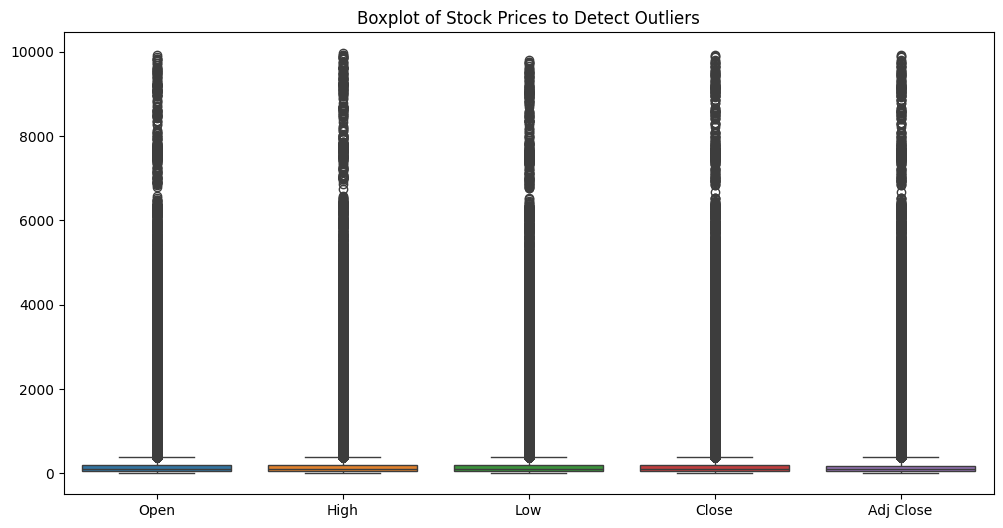

In [15]:
# Set figure size for better visibility
plt.figure(figsize=(12,6))

# Creating boxplots for key stock price columns to visualize outliers
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close', 'Adj Close']])

# Show the plot
plt.title("Boxplot of Stock Prices to Detect Outliers")
plt.show()

In [16]:
# Checking for any anomalies in numerical columns
print(df.describe())

# Identifying potential outliers in stock prices using IQR method
Q1 = df[['Open', 'High', 'Low', 'Close', 'Adj Close']].quantile(0.25)
Q3 = df[['Open', 'High', 'Low', 'Close', 'Adj Close']].quantile(0.75)
IQR = Q3 - Q1

# Filtering out potential outliers (Optional: Modify threshold if needed)
df = df[~((df[['Open', 'High', 'Low', 'Close', 'Adj Close']] < (Q1 - 1.5 * IQR)) |
          (df[['Open', 'High', 'Low', 'Close', 'Adj Close']] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Display dataset after outlier removal
print(df.shape)

           Adj Close          Close           High            Low  \
count  620481.000000  620481.000000  620481.000000  620481.000000   
mean      163.022622     166.619172     168.633861     164.558841   
std       323.705547     324.233768     328.008369     320.426383   
min         1.598000       1.598000       1.699000       1.576000   
25%        52.332901      55.119999      55.830002      54.389999   
50%        97.149071     100.949997     102.239998      99.650002   
75%       185.210007     190.479996     192.759995     188.130005   
max      9924.400391    9924.400391    9964.769531    9794.000000   

                Open        Volume  
count  620481.000000  6.204810e+05  
mean      166.611333  6.278714e+06  
std       324.147319  2.506906e+07  
min         1.582000  0.000000e+00  
25%        55.119999  9.987000e+05  
50%       100.949997  2.109800e+06  
75%       190.460007  4.878200e+06  
max      9914.169922  1.543911e+09  
(576917, 7)


In [17]:
# Creating new technical indicators for stock analysis

# Moving Average (7-day and 30-day)
df['MA7'] = df['Close'].rolling(window=7).mean()  # Short-term trend
df['MA30'] = df['Close'].rolling(window=30).mean()  # Long-term trend

# Relative Strength Index (RSI)
delta = df['Close'].diff(1)
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
df['RSI'] = 100 - (100 / (1 + rs))

# Volatility (Standard Deviation of Close Prices)
df['Volatility'] = df['Close'].rolling(window=21).std()

# Show dataset with new features
df.head()

,Symbol,Adj Close,Close,High,Low,Open,Volume,MA7,MA30,RSI,Volatility
Date,,,,,,,,,,,
2020-01-02,MMM,123.614929,150.501678,150.510040,148.110367,148.561874,4307633.0,NaN,NaN,NaN,NaN
2020-01-03,MMM,122.550476,149.205688,149.381271,146.847824,148.010040,2950412.0,NaN,NaN,NaN,NaN
2020-01-06,MMM,122.667252,149.347824,149.423080,147.449829,148.118729,2389608.0,NaN,NaN,NaN,NaN
2020-01-07,MMM,122.172775,148.745819,149.255859,147.842804,149.063538,2598908.0,NaN,NaN,NaN,NaN
2020-01-08,MMM,124.047577,151.028427,151.755859,148.536789,148.829437,3298927.0,NaN,NaN,NaN,NaN


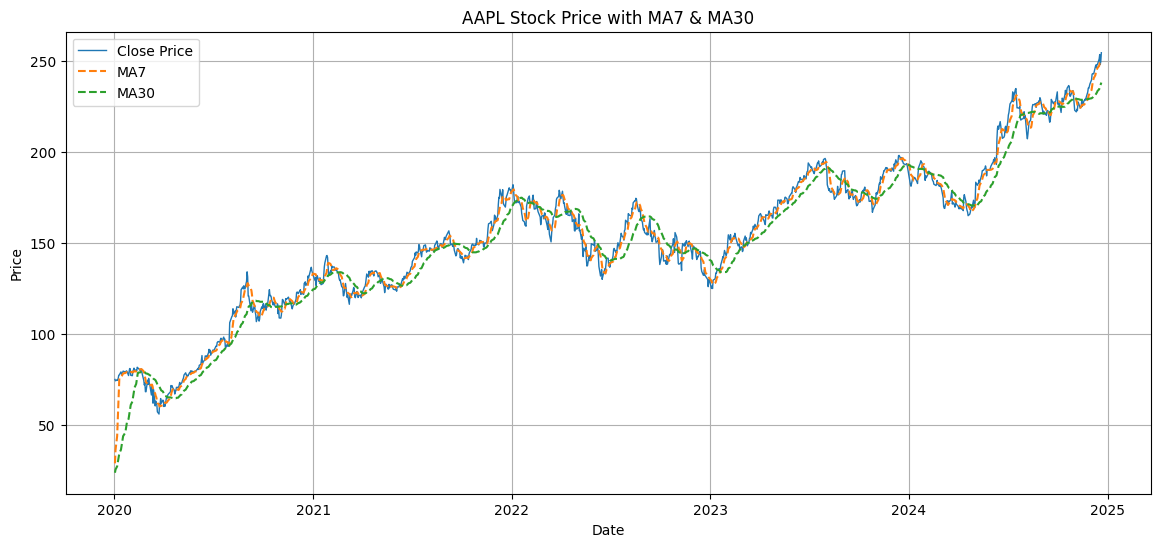

In [18]:
# Plotting Close Price with Moving Averages for a single company

# Pick one symbol to visualize (e.g., AAPL or any from df['Symbol'].unique())
symbol = 'AAPL'
df_symbol = df[df['Symbol'] == symbol]

plt.figure(figsize=(14,6))
plt.plot(df_symbol.index, df_symbol['Close'], label='Close Price', linewidth=1)
plt.plot(df_symbol.index, df_symbol['MA7'], label='MA7', linestyle='--')
plt.plot(df_symbol.index, df_symbol['MA30'], label='MA30', linestyle='--')

plt.title(f'{symbol} Stock Price with MA7 & MA30')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

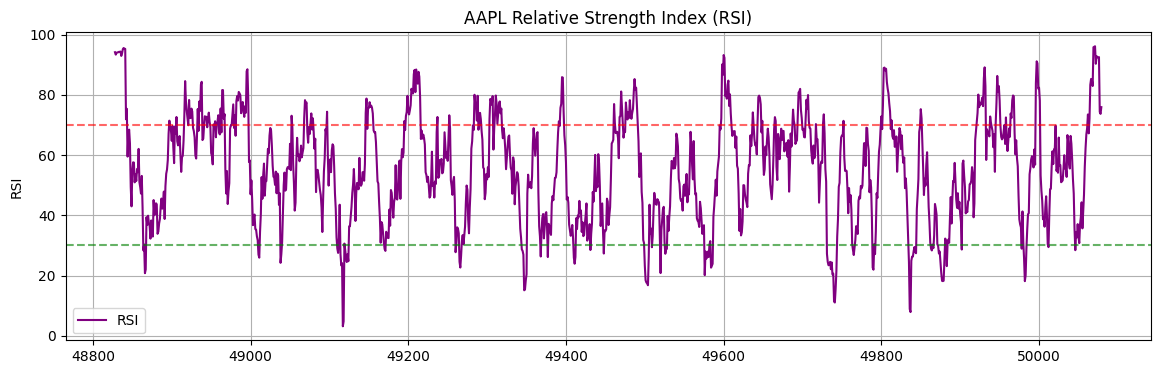

In [ ]:
# Plot RSI for the selected stock
plt.figure(figsize=(14,4))
plt.plot(df_symbol.index, df_symbol['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', color='red', alpha=0.6)
plt.axhline(30, linestyle='--', color='green', alpha=0.6)
plt.title(f'{symbol} Relative Strength Index (RSI)')
plt.ylabel('RSI')
plt.grid(True)
plt.legend()
plt.show()

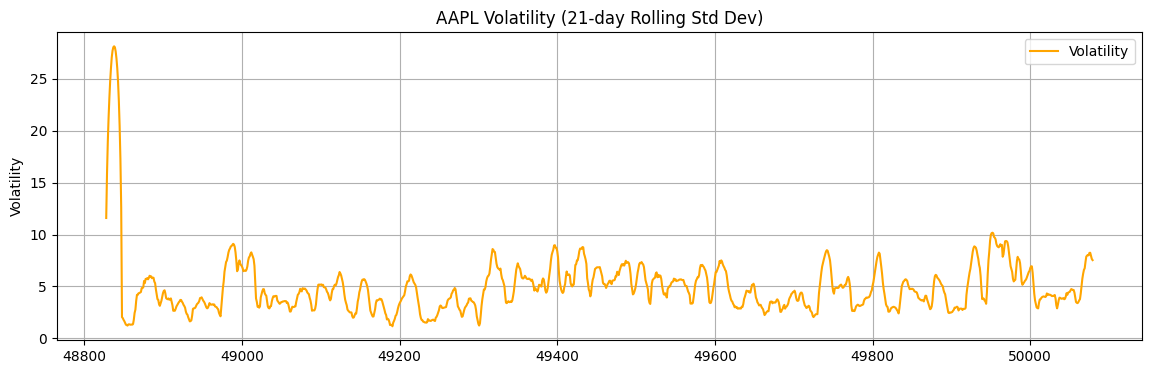

In [ ]:
# Plot Volatility for the selected stock
plt.figure(figsize=(14,4))
plt.plot(df_symbol.index, df_symbol['Volatility'], label='Volatility', color='orange')
plt.title(f'{symbol} Volatility (21-day Rolling Std Dev)')
plt.ylabel('Volatility')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Drop rows with any NaNs (from rolling indicators)
df_export = df.dropna().copy()

# Reset index to make 'Date' a regular column again
df_export.reset_index(inplace=True)

# Save as CSV for Tableau
df_export.to_csv('/path/sp500_processed.csv', index=False)

print("✅ Data exported for Tableau at: sp500_processed.csv")

✅ Data exported for Tableau at: sp500_processed.csv
